# AML-1104-Term-Project

### Group Name- Pheonix

#### Group Members: Siva Pavan Kumar Pothireddy (C0790652), Herat Shah (C0784334), Urvashi Patel (C0787478)

## Supervised Learning and Un-Supervised Learning Methods on Adult Dataset

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pointbiserialr, spearmanr
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
df = pd.read_csv(url)
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Assigning column names
column_names = ['age', 'workclass', 'fnlwgt', 'education','education-num', 'marital-status', 'occupation', 'relationship',
               'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                            names=column_names)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# To get detailed information about what are there the column names, null count, and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Missing Values and Handling Missing Values 

In [5]:
# Checking if there are any special chracters in the dataset
df.isin(['?']).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
# Repalacing special characters with nan values
df.replace('?',np.nan,inplace=True)

In [7]:
# Checking the missing values in the data set.
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
# To know any missing values in data
df.isnull().values.any()

False

In [9]:
# To know the shape of the dataset (Rows & Columns)
df.shape

(32561, 15)

In [10]:
# Change values in a column into binary.
income_level = {' <=50K': 0,' >50K': 1}
df.income = [income_level[item] for item in df.income]
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


In [11]:
# label encoding for changing categorical values to numerical values
le = preprocessing.LabelEncoder()
df[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country']]=df[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country']].apply(le.fit_transform)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [12]:
# Checking that all the columns are numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int32
 14  income          32561 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 2.7 MB


In [13]:
# To know if the values needed to be normalized or not
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,21.580326,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.635502,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,0.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,11.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,20.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,31.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,72.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


### Feature Scaling

In [14]:
# Normalization on the data
# data values
X = df
y = df['income']
# transofrm data
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=2)
print(rescaledX[0:3,:])

[[0.31 0.88 0.04 0.6  0.8  0.67 0.07 0.2  1.   1.   0.02 0.   0.4  0.95
  0.  ]
 [0.46 0.75 0.05 0.6  0.8  0.33 0.29 0.   1.   1.   0.   0.   0.12 0.95
  0.  ]
 [0.29 0.5  0.14 0.73 0.53 0.   0.43 0.2  1.   1.   0.   0.   0.4  0.95
  0.  ]]


### Feature Pruning and Selecting

In [15]:
col_names = df.columns
param=[]
correlation=[]
abs_corr=[]

for k in col_names:
    if k != "income":
        if len(df[k].unique()) <= 2:
            corr = spearmanr(df['income'],df[k])[0]
        else:
            corr = pointbiserialr(df['income'],df[k])[0]
        param.append(k)
        correlation.append(corr)
        abs_corr.append(abs(corr))
#Create dataframe
parameter_df=pd.DataFrame({'Correlation':correlation,'Parameters':param, 'Absolute_correlation':abs_corr})
#Sort by absolute correlation
parameter_df=parameter_df.sort_values(by=['Absolute_correlation'], ascending=False)
#Set parameters name as index
parameter_df=parameter_df.set_index('Parameters')
parameter_df

,Correlation,Absolute_correlation
Parameters,,
education-num,0.335154,0.335154
relationship,-0.250918,0.250918
age,0.234134,0.234134
hours-per-week,0.229689,0.229689
capital-gain,0.223329,0.223329
sex,0.215980,0.215980
marital-status,-0.199307,0.199307
capital-loss,0.150526,0.150526
education,0.079317,0.079317


In [16]:
# To know the optimal features in the dataset
optimal_features=parameter_df.index[0:8].values
optimal_features

array(['education-num', 'relationship', 'age', 'hours-per-week',
       'capital-gain', 'sex', 'marital-status', 'capital-loss'],
      dtype=object)

In [17]:
# Selecting subset of inputs having numbers as features for the model
df = df[['education-num', 'relationship', 'age', 'hours-per-week', 'capital-gain',
         'sex', 'marital-status', 'capital-loss']]
df.sample(5)

,education-num,relationship,age,hours-per-week,capital-gain,sex,marital-status,capital-loss
5996,7,3,3,60,0,1,4,0
24097,9,1,2,40,0,1,4,0
26590,7,3,0,12,0,0,4,0
28237,7,1,3,32,0,1,4,0
24959,9,5,26,35,0,0,2,0


In [18]:
# To know the shape of the dataset after feature selection
df.shape

(32561, 8)

In [19]:
# Descriptive statistics of the dataset
df.describe()

,education-num,relationship,age,hours-per-week,capital-gain,sex,marital-status,capital-loss
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,10.080679,1.446362,21.580326,40.437456,1077.648844,0.669205,2.611836,87.303830
std,2.572720,1.606771,13.635502,12.347429,7385.292085,0.470506,1.506222,402.960219
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,11.000000,40.000000,0.000000,0.000000,2.000000,0.000000
50%,10.000000,1.000000,20.000000,40.000000,0.000000,1.000000,2.000000,0.000000
75%,12.000000,3.000000,31.000000,45.000000,0.000000,1.000000,4.000000,0.000000
max,16.000000,5.000000,72.000000,99.000000,99999.000000,1.000000,6.000000,4356.000000


### Data Visualization

#### Using Histogram for selected features

<AxesSubplot:title={'center':'Hours Per Week'}, xlabel='Hours Per Week', ylabel='Frequency'>

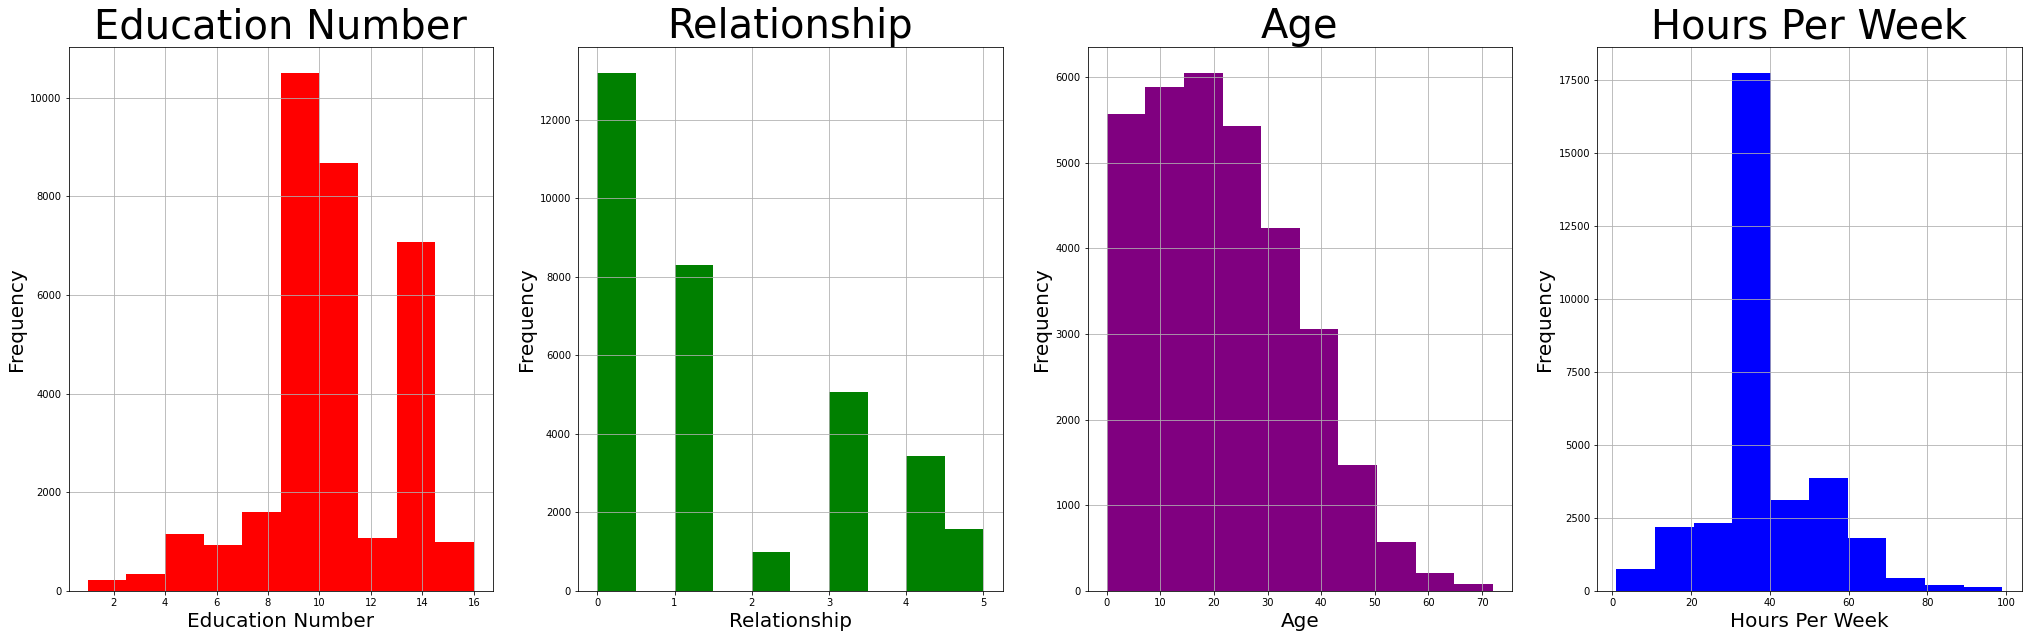

In [20]:
# Histogram for selected features
fig, axes = plt.subplots(1,4,figsize=(35, 10))
# Setting title names
axes[0].set_title("Education Number",size=40)
axes[1].set_title("Relationship",size=40)
axes[2].set_title("Age",size=40)
axes[3].set_title("Hours Per Week",size=40)
# Setting x-label and y-label
axes[0].set_xlabel("Education Number",size=20)
axes[1].set_xlabel("Relationship",size=20)
axes[2].set_xlabel("Age",size=20)
axes[3].set_xlabel("Hours Per Week",size=20)
axes[0].set_ylabel("Frequency",size=20)
axes[1].set_ylabel("Frequency",size=20)
axes[2].set_ylabel("Frequency",size=20)
axes[3].set_ylabel("Frequency",size=20)
# Selected columns
df['education-num'].hist(bins=10, ax=axes[0],color='r')
df['relationship'].hist(bins=10, ax=axes[1],color='g')
df['age'].hist(bins=10, ax=axes[2],color='purple')
df['hours-per-week'].hist(bins=10, ax=axes[3],color='b')

<AxesSubplot:title={'center':'Capital Loss'}, xlabel='Capital Loss', ylabel='Frequency'>

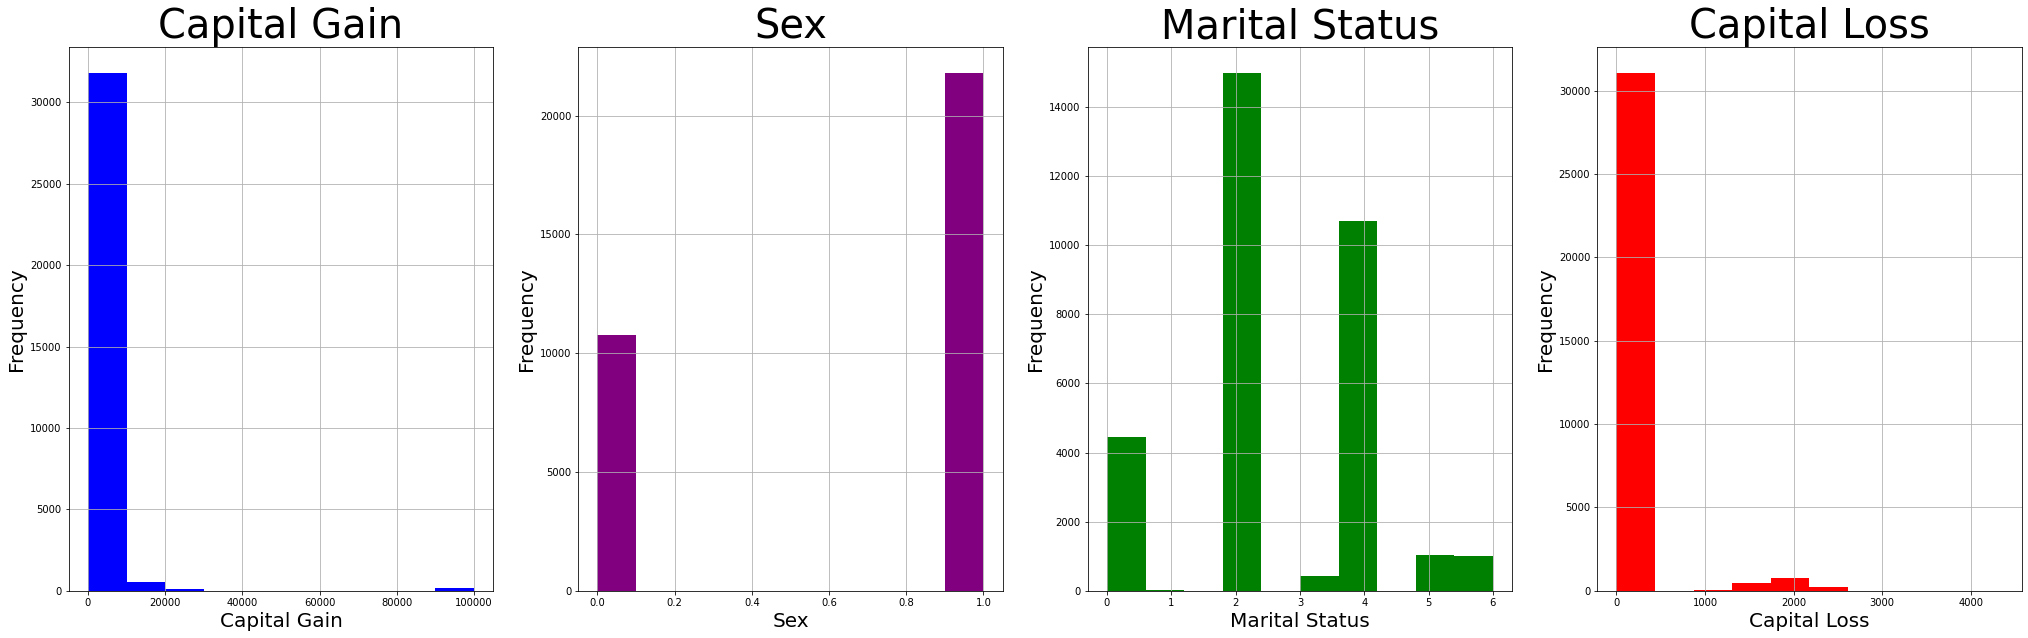

In [21]:
# Histogram for selected features
fig, axes = plt.subplots(1,4,figsize=(35, 10))
# Setting title names
axes[0].set_title("Capital Gain",size=40)
axes[1].set_title("Sex",size=40)
axes[2].set_title("Marital Status",size=40)
axes[3].set_title("Capital Loss",size=40)
# Setting x-label and y-label
axes[0].set_xlabel("Capital Gain",size=20)
axes[1].set_xlabel("Sex",size=20)
axes[2].set_xlabel("Marital Status",size=20)
axes[3].set_xlabel("Capital Loss",size=20)
axes[0].set_ylabel("Frequency",size=20)
axes[1].set_ylabel("Frequency",size=20)
axes[2].set_ylabel("Frequency",size=20)
axes[3].set_ylabel("Frequency",size=20)
# Selected columns
df['capital-gain'].hist( bins=10, ax=axes[0],color='b')
df['sex'].hist( bins=10, ax=axes[1],color='purple')
df['marital-status'].hist( bins=10, ax=axes[2],color='g')
df['capital-loss'].hist( bins=10, ax=axes[3],color='r')

<AxesSubplot:>

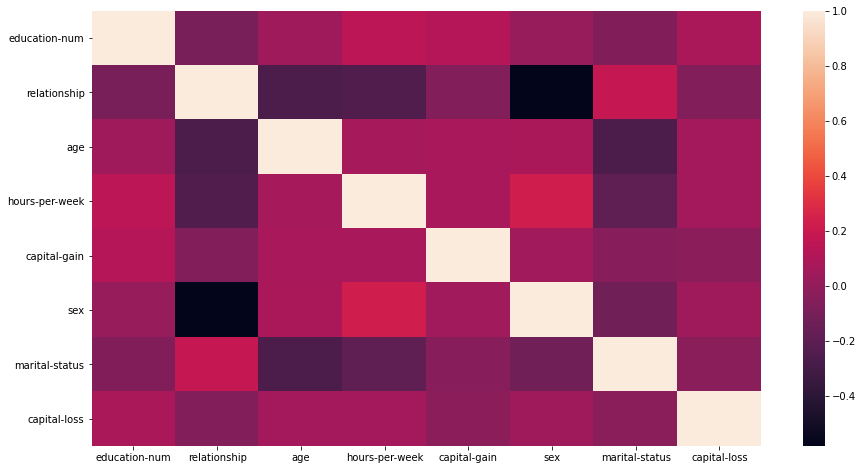

In [22]:
# Heatmap of the features to find the correlation between them
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())

#### Central Tendency

In [23]:
# CT for Education Number
education_num_mean = print(df.loc[:,'education-num'].mean())
education_num_mode = print(df.loc[:,'education-num'].mode())
education_num_median= print(df.loc[:,'education-num'].median())
education_num_ct = {'mean':[10.0806793403151],'mode':[0],'median':[9]}
education_num_ct_df = pd.DataFrame(education_num_ct)
education_num_ct_df

10.0806793403151
0    9
dtype: int64
10.0


,mean,mode,median
0,10.080679,0,9


<AxesSubplot:>

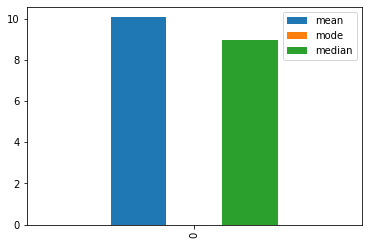

In [24]:
education_num_ct_df.plot(y=["mean", "mode", "median"], kind="bar")

In [25]:
# CT for Relationship
relationship_mean = print(df.loc[:,'relationship'].mean())
relationship_mode = print(df.loc[:,'relationship'].mode())
relationship_median= print(df.loc[:,'relationship'].median())
relationship_ct = {'mean':[1.4463622124627622],'mode':[0],'median':[0]}
relationship_ct_df = pd.DataFrame(relationship_ct)
relationship_ct_df

1.4463622124627622
0    0
dtype: int32
1.0


,mean,mode,median
0,1.446362,0,0


<AxesSubplot:>

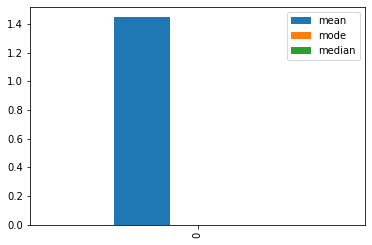

In [26]:
relationship_ct_df.plot(y=["mean", "mode", "median"], kind="bar")

In [27]:
# CT for Age
age_mean = print(df.loc[:,'age'].mean())
age_mode = print(df.loc[:,'age'].mode())
age_median= print(df.loc[:,'age'].median())
age_ct = {'mean':[21.58032615705906],'mode':[0],'median':[19]}
age_ct_df = pd.DataFrame(age_ct)
age_ct_df

21.58032615705906
0    19
dtype: int64
20.0


,mean,mode,median
0,21.580326,0,19


<AxesSubplot:>

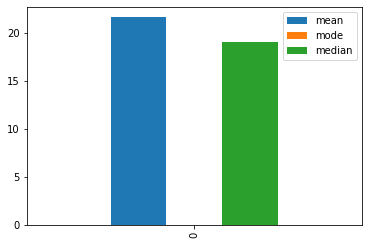

In [28]:
age_ct_df.plot(y=["mean", "mode", "median"], kind="bar")

In [29]:
# CT for Hours Per Week
hours_per_week_mean = print(df.loc[:,'hours-per-week'].mean())
hours_per_week_mode = print(df.loc[:,'hours-per-week'].mode())
hours_per_week_median= print(df.loc[:,'hours-per-week'].median())
hours_per_week_ct = {'mean':[40.437455852092995],'mode':[0],'median':[40]}
hours_per_week_ct_df = pd.DataFrame(hours_per_week_ct)
hours_per_week_ct_df

40.437455852092995
0    40
dtype: int64
40.0


,mean,mode,median
0,40.437456,0,40


<AxesSubplot:>

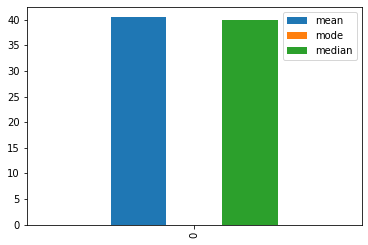

In [30]:
hours_per_week_ct_df.plot(y=["mean", "mode", "median"], kind="bar")

In [31]:
capital_gain_mean = print(df.loc[:,'capital-gain'].mean())
capital_gain_mode = print(df.loc[:,'capital-gain'].mode())
capital_gain_median= print(df.loc[:,'capital-gain'].median())
capital_gain_ct = {'mean':[1077.6488437087312],'mode':[0],'median':[0]}
capital_gain_ct_df = pd.DataFrame(capital_gain_ct)
capital_gain_ct_df

1077.6488437087312
0    0
dtype: int64
0.0


,mean,mode,median
0,1077.648844,0,0


<AxesSubplot:>

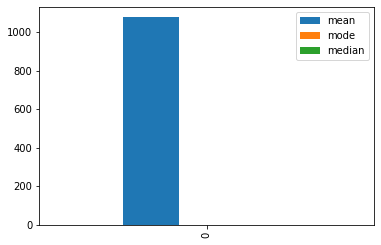

In [32]:
capital_gain_ct_df.plot(y=["mean", "mode", "median"], kind="bar")

In [33]:
sex_mean = print(df.loc[:,'sex'].mean())
sex_mode = print(df.loc[:,'sex'].mode())
sex_median= print(df.loc[:,'sex'].median())
sex_ct = {'mean':[0.6692054912318418],'mode':[0],'median':[1]}
sex_ct_df = pd.DataFrame(sex_ct)
sex_ct_df

0.6692054912318418
0    1
dtype: int32
1.0


,mean,mode,median
0,0.669205,0,1


<AxesSubplot:>

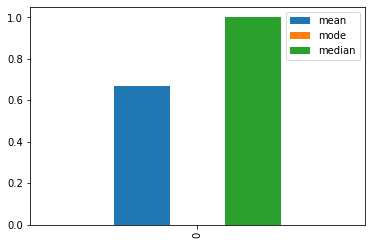

In [34]:
sex_ct_df.plot(y=["mean", "mode", "median"], kind="bar")

In [35]:
marital_status_mean = print(df.loc[:,'marital-status'].mean())
marital_status_mode = print(df.loc[:,'marital-status'].mode())
marital_status_median= print(df.loc[:,'marital-status'].median())
marital_status_ct = {'mean':[2.6118362458155464],'mode':[0],'median':[2]}
marital_status_ct_df = pd.DataFrame(marital_status_ct)
marital_status_ct_df

2.6118362458155464
0    2
dtype: int32
2.0


,mean,mode,median
0,2.611836,0,2


<AxesSubplot:>

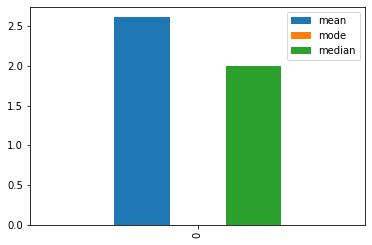

In [36]:
marital_status_ct_df.plot(y=["mean", "mode", "median"], kind="bar")

In [37]:
capital_loss_mean = print(df.loc[:,'capital-loss'].mean())
capital_loss_mode = print(df.loc[:,'capital-loss'].mode())
capital_loss_median= print(df.loc[:,'capital-loss'].median())
capital_loss_ct = {'mean':[87.303829734959],'mode':[0],'median':[0]}
capital_loss_ct_df = pd.DataFrame(capital_loss_ct)
capital_loss_ct_df

87.303829734959
0    0
dtype: int64
0.0


,mean,mode,median
0,87.30383,0,0


<AxesSubplot:>

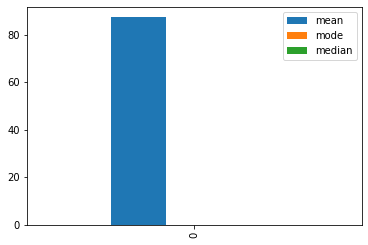

In [38]:
capital_loss_ct_df.plot(y=["mean", "mode", "median"], kind="bar")

#### Standard Deviation

In [39]:
# Finding Standard Deviation For Selected Features
education_number_data_std = df['education-num']
relationship_data_std = df['relationship']
age_data_std = df['age']
hours_per_week_data_std = df['hours-per-week']
capital_gain_data_std = df['capital-gain']
sex_data_std = df['sex']
marital_status_data_std = df['marital-status']
capital_loss_data_std = df['capital-loss']

print('Education Number Standard Deviation:',education_number_data_std.std())
print('Realtionship Standard Deviation:',relationship_data_std.std())
print('Age Standard Deviation:',age_data_std.std())
print('Hours Per Week Standard Deviation:',hours_per_week_data_std.std())
print('Capital Gain Standard Deviation:',capital_gain_data_std.std())
print('Sex Standard Deviation:',sex_data_std.std())
print('Marital Status Standard Deviation:',marital_status_data_std.std())
print('Capital Loss Standard Deviation:',capital_loss_data_std.std())


elements_std = {'education-num':[2.5727203320673877],'relationship':[1.6067709504166332],'age':[13.635501787496212],'hours-per-week':[12.347428681731843],'capital-gain':[7385.292084840338],
               'sex':[0.47050642987594976],'marital-status':[1.50622172316238],'capital-loss':[402.9602186489998]}
elements_std_df = pd.DataFrame(elements_std)
elements_std_df

Education Number Standard Deviation: 2.5727203320673877
Realtionship Standard Deviation: 1.6067709504166332
Age Standard Deviation: 13.635501787496212
Hours Per Week Standard Deviation: 12.347428681731843
Capital Gain Standard Deviation: 7385.292084840338
Sex Standard Deviation: 0.47050642987594976
Marital Status Standard Deviation: 1.50622172316238
Capital Loss Standard Deviation: 402.9602186489998


,education-num,relationship,age,hours-per-week,capital-gain,sex,marital-status,capital-loss
0,2.57272,1.606771,13.635502,12.347429,7385.292085,0.470506,1.506222,402.960219


#### Interquartile Range

In [40]:
# IQR for Education Number
education_num_data= df['education-num']
sorted(education_num_data)
q1, q3= np.percentile(education_num_data,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('Lower Bound:',lower_bound,'Upper Bound:',upper_bound,'IQR:',iqr)

Lower Bound: 4.5 Upper Bound: 16.5 IQR: 3.0


In [41]:
# IQR for Relationship
relationship_data= df['relationship']
sorted(relationship_data)
q1, q3= np.percentile(relationship_data,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('Lower Bound:',lower_bound,'Upper Bound:',upper_bound,'IQR:',iqr)

Lower Bound: -4.5 Upper Bound: 7.5 IQR: 3.0


In [42]:
# IQR for Age
age_data= df['age']
sorted(age_data)
q1, q3= np.percentile(age_data,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('Lower Bound:',lower_bound,'Upper Bound:',upper_bound,'IQR:',iqr)

Lower Bound: -19.0 Upper Bound: 61.0 IQR: 20.0


In [43]:
# IQR for Hours Per Week
hours_per_week_data= df['hours-per-week']
sorted(hours_per_week_data)
q1, q3= np.percentile(hours_per_week_data,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('Lower Bound:',lower_bound,'Upper Bound:',upper_bound,'IQR:',iqr)

Lower Bound: 32.5 Upper Bound: 52.5 IQR: 5.0


In [44]:
# IQR for Capital Gain
capital_gain_data= df['capital-gain']
sorted(capital_gain_data)
q1, q3= np.percentile(capital_gain_data,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('Lower Bound:',lower_bound,'Upper Bound:',upper_bound,'IQR:',iqr)

Lower Bound: 0.0 Upper Bound: 0.0 IQR: 0.0


In [45]:
# IQR for Sex
sex_data= df['sex']
sorted(sex_data)
q1, q3= np.percentile(sex_data,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('Lower Bound:',lower_bound,'Upper Bound:',upper_bound,'IQR:',iqr)

Lower Bound: -1.5 Upper Bound: 2.5 IQR: 1.0


In [46]:
# IQR for Marital Status
marital_status_data= df['marital-status']
sorted(marital_status_data)
q1, q3= np.percentile(marital_status_data,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('Lower Bound:',lower_bound,'Upper Bound:',upper_bound,'IQR:',iqr)

Lower Bound: -1.0 Upper Bound: 7.0 IQR: 2.0


In [47]:
# IQR for Capital Loss
capital_loss_data= df['capital-loss']
sorted(capital_loss_data)
q1, q3= np.percentile(capital_loss_data,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('Lower Bound:',lower_bound,'Upper Bound:',upper_bound,'IQR:',iqr)

Lower Bound: 0.0 Upper Bound: 0.0 IQR: 0.0


### Model Implementation

#### Splitting the data into training and testing

In [48]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)# size of training data will 70%

#### Supervised Model

In [49]:
# Applying K-NearestNeighborsClassifier model
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
# model is now ready as we fitted training data in model
classifier.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
# Observe performance of model
print(classifier.score(X_test,y_test))

0.7758214760978606


In [51]:
# Complete report of the Classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      7441
           1       0.55      0.31      0.40      2328

    accuracy                           0.78      9769
   macro avg       0.68      0.62      0.63      9769
weighted avg       0.75      0.78      0.75      9769



In [52]:
# Create confusion matrix
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[6850  591]
 [1599  729]]


In [53]:
# Applying Logistic Regression model 
model = LogisticRegression()
model.fit(X_train, y_train)
# model is now ready as we fitted training data in model
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
# Observe performance of model
print(model.score(X_test,y_test))

0.7886170539461562


In [55]:
# Complete Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      7441
           1       0.55      0.31      0.40      2328

    accuracy                           0.78      9769
   macro avg       0.68      0.62      0.63      9769
weighted avg       0.75      0.78      0.75      9769



In [56]:
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[6850,  591],
       [1599,  729]], dtype=int64)

#### Unsupervised Learning

##### Only Constraint Please run the below code cell once again if it through inifs and NaNs :)

#### This error is due to sklearn version, we checked if data contaians any inifs and NaNs in the next cell

In [58]:
# Using PCA for dimensionality reduction, and reducted to two columns
pca = PCA(n_components=2)
feature_components = pca.fit_transform(X)
pca_df = pd.DataFrame(data = feature_components,columns = ['Components_1', 'Components_2'])
pca_df

,Components_1,Components_2
0,-112262.329671,1099.917121
1,-106467.395748,-1074.257839
2,25867.604143,-1078.283593
3,44942.603983,-1078.862215
4,148630.604214,-1082.020975
...,...,...
32556,67523.604205,-1079.553087
32557,-35404.395797,-1076.418545
32558,-37868.395971,-1076.341163
32559,11711.604365,-1077.857824


In [59]:
# Checking if there are any isinf and NaNs in the data
# Checking isnan
np.any(np.isnan(X))
# Checking isinf
np.any(np.isinf(X))

False

<AxesSubplot:xlabel='Components_1', ylabel='Components_2'>

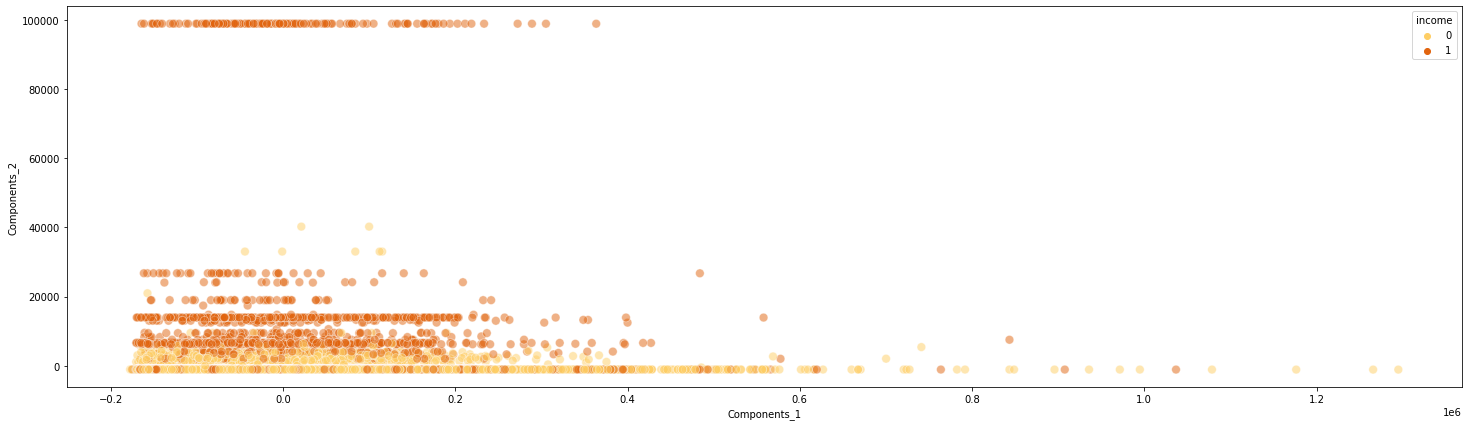

In [60]:
#create a new figure using seaborn between 0 and 1 target column
plt.figure(figsize=(25,7))
sns.scatterplot(pca_df['Components_1'], pca_df['Components_2'], hue=y,palette="YlOrBr", alpha=0.5, s=75)

In [61]:
# Created 3 clusters with the help of Kmeans
km=KMeans(n_clusters=3)
y_pred= km.fit_predict(feature_components)
print(y_pred)
feature_components=pd.DataFrame(feature_components)
feature_components['clusters']=y_pred
df['clusters']=y_pred
feature_components=pd.DataFrame(feature_components)
df.head(5)

[2 2 0 ... 0 0 0]


,education-num,relationship,age,hours-per-week,capital-gain,sex,marital-status,capital-loss,clusters
0,13,1,22,40,2174,1,4,0,2
1,13,0,33,13,0,1,2,0,2
2,9,1,21,40,0,1,0,0,0
3,7,0,36,40,0,1,2,0,0
4,13,5,11,40,0,0,2,0,1


In [62]:
# Checking silhouette score
labels = km.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.5521912220022439

In [63]:
# Checking calinski harabasz score
metrics.calinski_harabasz_score(X, labels)

56324.06041537956

In [64]:
# Created 8 clusters with the help of Kmeans
km=KMeans(n_clusters=10)
y_pred= km.fit_predict(feature_components)
print(y_pred)
feature_components=pd.DataFrame(feature_components)
feature_components['clusters']=y_pred
df['clusters']=y_pred
element_components=pd.DataFrame(feature_components)
df.head(5)

[0 0 3 ... 9 4 1]


,education-num,relationship,age,hours-per-week,capital-gain,sex,marital-status,capital-loss,clusters
0,13,1,22,40,2174,1,4,0,0
1,13,0,33,13,0,1,2,0,0
2,9,1,21,40,0,1,0,0,3
3,7,0,36,40,0,1,2,0,3
4,13,5,11,40,0,0,2,0,5


In [65]:
# Checking silhouette score
labels = km.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.528408134280004

In [66]:
# Checking calinski harabasz score
metrics.calinski_harabasz_score(X, labels)

110568.4294547376

In [67]:
# Using Distortion and Inertia, for each value of k, initialised k_means to identify the sum of squared distances of samples to the nearest cluster centre
squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    model = km.fit(X)
    squared_distances.append(km.inertia_)

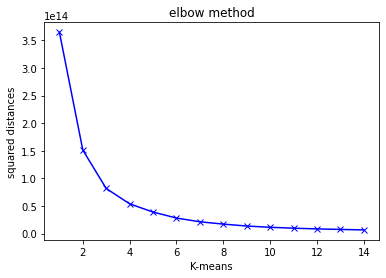

In [68]:
# Plotting elbow method of k
plt.plot(K, squared_distances, 'bx-')
plt.xlabel('K-means')
plt.ylabel('squared distances')
plt.title('elbow method')
plt.show()

In [69]:
# According to the Elbow graph we deterrmine the optimal clusters number is #7
km = KMeans(n_clusters=7, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_km = km.fit_predict(X)

In [70]:
# Checking silhouette score
labels = km.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.5444141015999823

In [71]:
# Checking calinski harabasz score
metrics.calinski_harabasz_score(X, labels)

86697.91526439469